In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
df= pd.read_csv('C:\\Users\\sarav\\Downloads\\Mall_Customers.csv', index_col = 0) #loads the csv file into a pandas dataframe
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.rename(columns= {'Genre': 'Gender'}, inplace = True) #To rename column 2 from Genre to Gender
df.head() 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:

df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated()

CustomerID
1      False
2      False
3      False
4      False
5      False
       ...  
196    False
197    False
198    False
199    False
200    False
Length: 200, dtype: bool

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

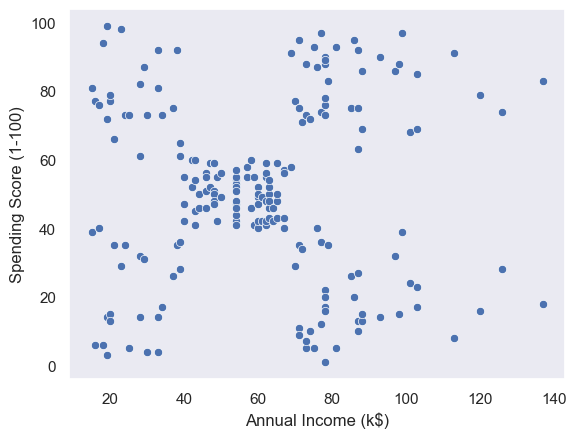

In [10]:
sns.set_style('dark')
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title

In [11]:

X = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

In [12]:
from array import array

In [13]:
scaler = MinMaxScaler().fit(X) #It makes an object of the MinMaxScaler and then we fit it on our variable X. 
print(scaler)
MinMaxScaler()

scaler.feature_range
(0, 1)

scaler.transform(X) 
import numpy as np

arr = np.array([
    [0.0, 0.3877551],
    [0.0, 0.81632653],
    [0.00819672, 0.05102041],
    [0.00819672, 0.7755102],
    [0.01639344, 0.39795918],
    [0.0, 0.81632653]
])

print(arr)

MinMaxScaler()
[[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]
 [0.         0.81632653]]


In [14]:
import sklearn
from sklearn.utils import _openmp_helpers
_openmp_helpers._openmp_effective_n_threads = lambda: 1  # force 1 thread


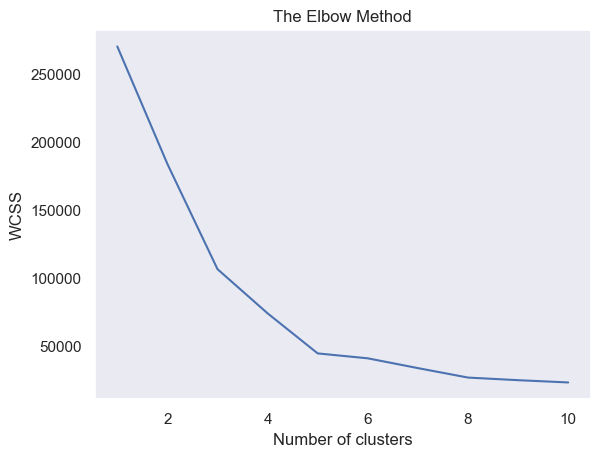

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

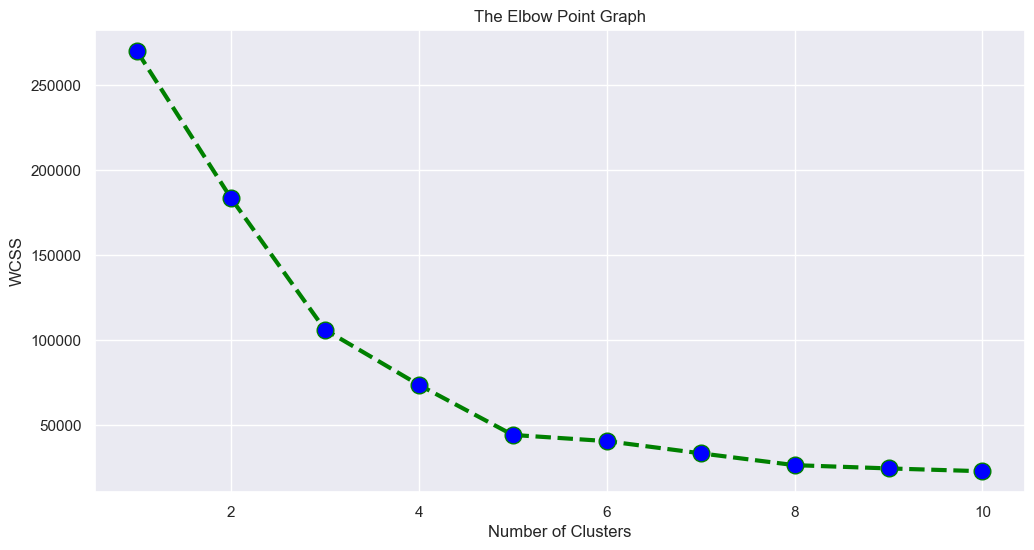

In [16]:
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11),wcss, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

In [17]:
kmeans= KMeans(n_clusters = 5, init = 'k-means++') #initialize the class object
label= kmeans.fit_predict(X) #returns a cluster number for each of the data points
print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [18]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


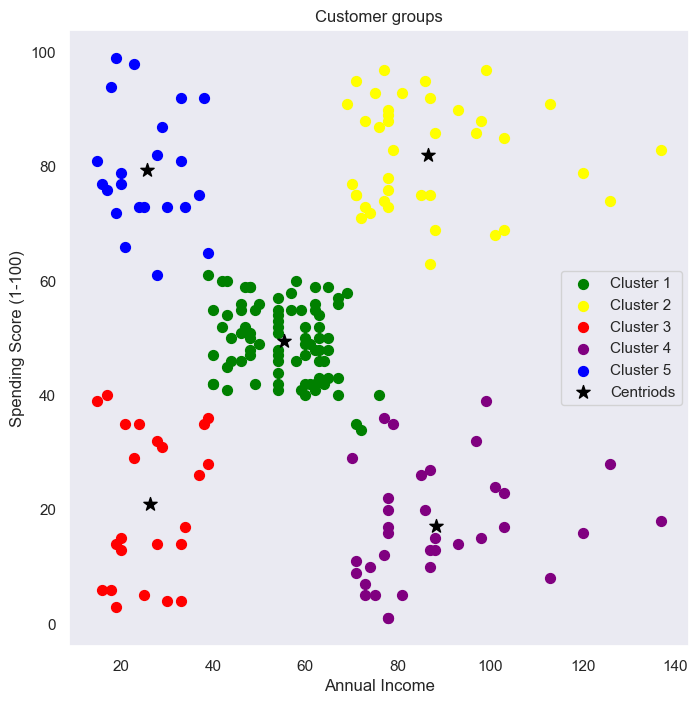

In [19]:

plt.figure(figsize=(8,8))
plt.scatter(X[label == 0,0], X[label== 0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[label == 1,0], X[label== 1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[label == 2,0], X[label== 2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[label == 3,0], X[label== 3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[label == 4,0], X[label== 4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods') #Plotting the centriods
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()  